In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from scipy.misc import *
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import f1_score


# Settings:
img_size = 64
grayscale_images = True
num_class = 10
test_size = 0.2
feature = [i for i in range(1,15)]


X = np.load('X.npy')
y = np.load('Y.npy')

Y=np.zeros((2062,))

for i in range(2062):
    for j in range(10):
        Y[i]+=y[i,j]*j

X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=7)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: -1.252733321961141


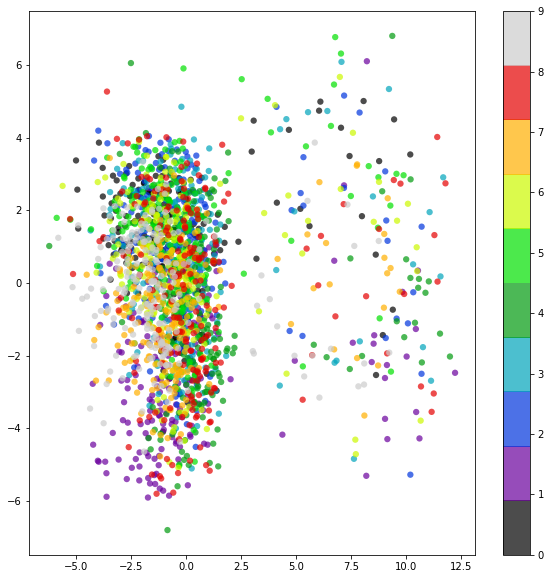

In [4]:
pca = decomposition.PCA(n_components=2, random_state=7)
X_pca_2 = pca.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=Y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

In [5]:
pca = decomposition.PCA(n_components=178, random_state=7)
X_pca = pca.fit_transform(X)

print(np.sum(pca.explained_variance_ratio_))

0.9005779


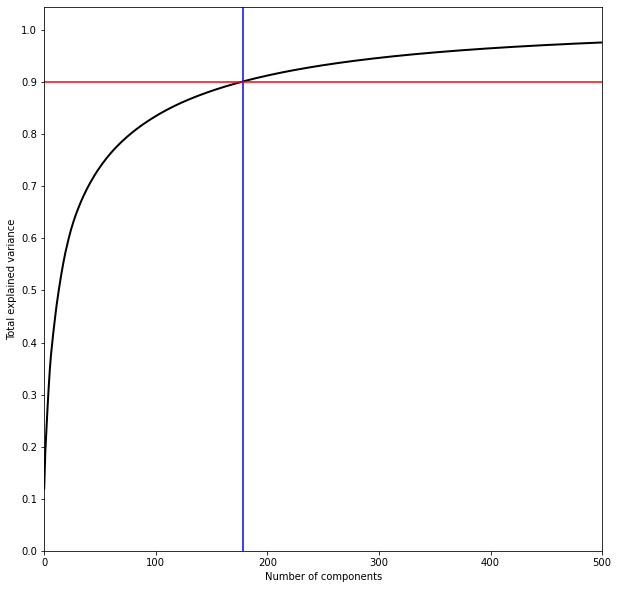

In [6]:
pca = decomposition.PCA(random_state=7)
pca.fit(X)

plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 500)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(178, c='b')
plt.axhline(0.9, c='r')
plt.show();

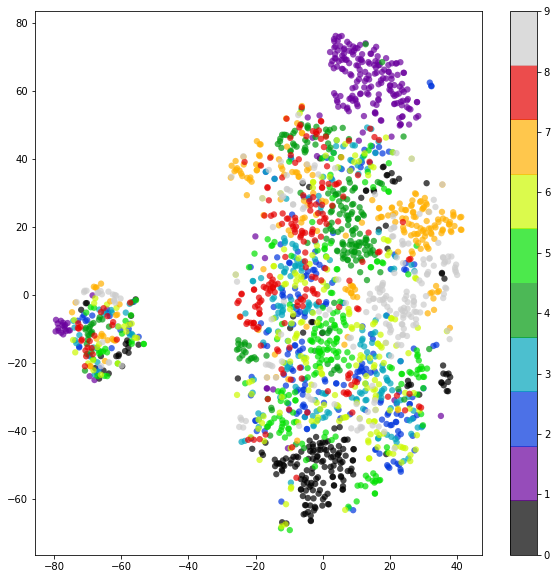

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=7)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y,edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

In [15]:
algo = KMeans(n_clusters=10, random_state=None)

print(X_tsne.shape, Y)

data = []
algo.fit(X)
data.append(({
    'ARI': metrics.adjusted_rand_score(Y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(Y, algo.labels_, average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(Y, algo.labels_),
        'Completeness': metrics.completeness_score(Y, algo.labels_),
        'V-measure': metrics.v_measure_score(Y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)
}))
algo.fit(X_pca)
data.append(({
    'ARI': metrics.adjusted_rand_score(Y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(Y, algo.labels_, average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(Y, algo.labels_),
        'Completeness': metrics.completeness_score(Y, algo.labels_),
        'V-measure': metrics.v_measure_score(Y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)
}))

results = pd.DataFrame(
    data=data,
    columns=['ARI', 'AMI', 'Homogenity', 'Completeness', 'V-measure', 'Silhouette'],
    index=['K-means', 'K-meansPCA']
)

results

(2062, 2) [0. 0. 0. ... 9. 9. 9.]


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.119732,0.187757,0.192138,0.197682,0.194870,0.035452
K-meansPCA,0.120376,0.186868,0.191254,0.196807,0.193991,0.037156


In [18]:
def plot_cluster_data(X, c=[1]*X.shape[0], mu=None):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    if len(np.unique(c)) == 1:
        ax.plot(X[:,0], X[:,1], 'o')
    else:
        ix = np.where(c==1)
        ax.plot(X[ix,0], X[ix,1], 'o', 
                markerfacecolor='red')
        ax.plot(mu[0,0], mu[0,1], 'o', 
                markerfacecolor='red', 
                markersize=12)
        ix = np.where(c==0)
        ax.plot(X[ix,0], X[ix,1], 'o', 
                markerfacecolor='green')
        ax.plot(mu[1,0], mu[1,1], 'o', 
                markerfacecolor='green', 
                markersize=12)
    if not mu is None:
        for i in range(10):
            ax.plot(mu[i,0], mu[i,1], 'o', 
                    markerfacecolor='red', 
                    markersize=12)
    plt.show()

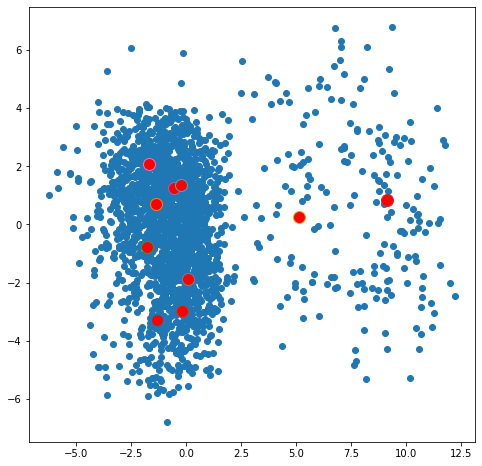

In [19]:
mu = algo.cluster_centers_
plot_cluster_data(X_pca, mu=mu)

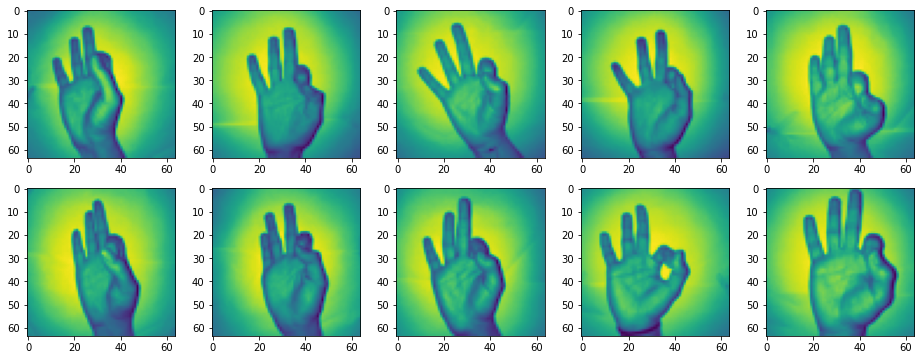

In [20]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([64,64]));